## Importing libraries

In [1]:
import pandas as pd
import requests 
from bs4 import BeautifulSoup

### Making requests and scraping products and prices

In [5]:

product_name = []
Prices = []

# Base URL with placeholder for page number
base_url = "https://www.ebay.com/sch/i.html?_from=R40&_nkw=mobile+phones&_sacat=0&_ipg=240&_pgn="

# Specify the number of pages you want to scrape
num_pages = 5  # Change this to the desired number of pages

# Loop through the specified number of pages
for page in range(1, num_pages + 1):
    # Build the URL for the current page
    url = base_url + str(page)
    r = requests.get(url)
    
    # Parse the response text with BeautifulSoup
    soup = BeautifulSoup(r.text, "lxml")
    
    # Find the container holding the product listings
    box = soup.find("ul", class_='srp-results srp-list clearfix')
    
    # Find each product's container
    items = box.find_all("li", class_='s-item')
    
    # Scrape product names and prices simultaneously
    for item in items:
        # Scrape the product name
        name = item.find("div", class_='s-item__title')
        if name:
            product_name.append(name.text.strip())
        
        # Scrape the price associated with the product
        price = item.find("span", class_='s-item__price')
        if price and 'DEFAULT' not in price.get('class', []):
            Prices.append(price.text.strip())
    
    
    time.sleep(2)  # Wait 2 seconds before the next request 

# Output the total number of products and prices scraped
print(f"Total number of product names: {len(product_name)}")
print(f"Total number of prices: {len(Prices)}")

#print the first few scraped items to check correctness
print("\nSample product names and prices:")
for name, price in zip(product_name[:5], Prices[:5]):
    print(f"Product: {name}, Price: {price}")


Total number of product names: 1274
Total number of prices: 1274

Sample product names and prices:
Product: New ListingApple iPhone 13 - 128 GB - Pink (T-Mobile), Price: $280.00
Product: Brand New Sealed Samsung Galaxy Note 20 Ultra 5G 256GB/128GB Factory Unlocked, Price: $322.96 to $370.46
Product: Google Pixel 6 | 6a | 6 Pro - 128GB 256GB 512GB - Unlocked Verizon T-Mobile AT&T, Price: $139.95 to $214.95
Product: New ListingSamsung Galaxy S21 Plus-128GB- Black -Unlocked Smartphone -Brand New Sealed, Price: $235.25
Product: Samsung Galaxy A6 SM-A600 - 32GB - Black (Unlocked), Price: $43.37


In [6]:
# Create a DataFrame from the scraped data
df = pd.DataFrame({
    "Product Name": product_name,
    "Price": Prices
})

# Export the DataFrame to a CSV file
df.to_csv("ebay_mobile_phones.csv", index=False)

print("Data successfully saved to 'ebay_mobile_phones.csv'")

print(df.head())

Data successfully saved to 'ebay_mobile_phones.csv'
                                        Product Name               Price
0  New ListingApple iPhone 13 - 128 GB - Pink (T-...             $280.00
1  Brand New Sealed Samsung Galaxy Note 20 Ultra ...  $322.96 to $370.46
2  Google Pixel 6 | 6a | 6 Pro - 128GB 256GB 512G...  $139.95 to $214.95
3  New ListingSamsung Galaxy S21 Plus-128GB- Blac...             $235.25
4  Samsung Galaxy A6 SM-A600 - 32GB - Black (Unlo...              $43.37


## Data Analysis

In [13]:
df.head()

,Product Name,Price
0,New ListingApple iPhone 13 - 128 GB - Pink (T-...,$280.00
1,Brand New Sealed Samsung Galaxy Note 20 Ultra ...,$322.96 to $370.46
2,Google Pixel 6 | 6a | 6 Pro - 128GB 256GB 512G...,$139.95 to $214.95
3,New ListingSamsung Galaxy S21 Plus-128GB- Blac...,$235.25
4,Samsung Galaxy A6 SM-A600 - 32GB - Black (Unlo...,$43.37


In [15]:
#  convert price ranges to average or handle single prices
def clean_price(price):
    if ' to ' in price:  # If the price is a range
        low, high = price.split(' to ')
        return (float(low) + float(high)) / 2  # Take the average of the range
    else:
        return float(price)  # Convert single price to float

In [16]:
# Remove currency symbols and commas
df['Price'] = df['Price'].replace({'\$': '', ',': ''}, regex=True)

In [17]:
# Apply the clean_price function to each price
df['Price'] = df['Price'].apply(clean_price)

In [18]:
# Basic statistics
print("Price Statistics:")
print(df['Price'].describe())

Price Statistics:
count    1274.000000
mean      261.220157
std       203.171583
min         0.990000
25%       118.422500
50%       209.960000
75%       341.997500
max      1248.520000
Name: Price, dtype: float64


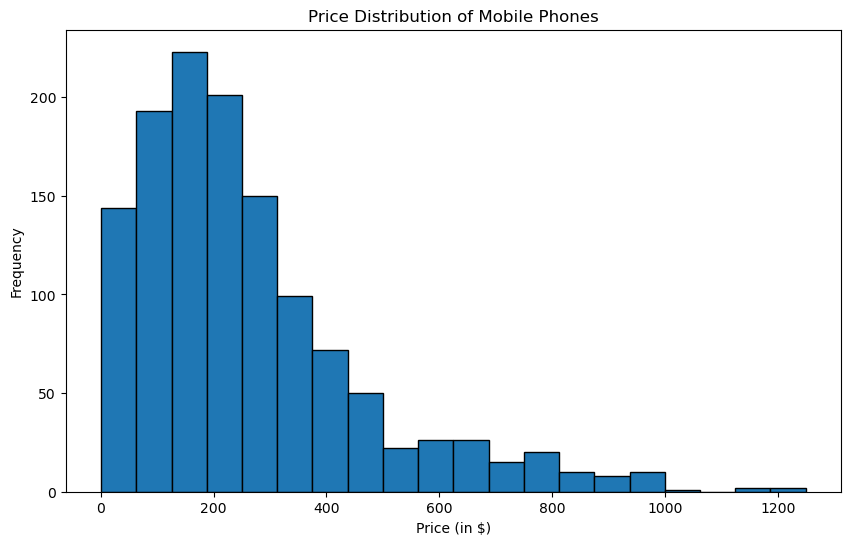

In [21]:
import matplotlib.pyplot as plt
# Plotting a histogram of prices
plt.figure(figsize=(10, 6))
plt.hist(df['Price'], bins=20, edgecolor='black')
plt.title("Price Distribution of Mobile Phones")
plt.xlabel("Price (in $)")
plt.ylabel("Frequency")
plt.show()

## Most expensive and Cheapest price products

In [22]:
# Top 5 most expensive products
print("Top 5 Most Expensive Products:")
print(df.sort_values(by="Price", ascending=False).head(5))

Top 5 Most Expensive Products:
                                           Product Name    Price
876   Xiaomi 14 Ultra 5G 16GB+512GB - Dual SIM - Bla...  1248.52
871   Sony Xperia 1 VI XQ-EC72 256/512GB 12GB RAM Un...  1189.99
396   Samsung Galaxy S24 Ultra - 256GB - 512GB - 1TB...  1182.81
1260  New ListingApple iPhone 15 Pro Max - 256 GB - ...  1150.00
1083  SAMSUNG GALAXY S24 ULTRA 256GB 512GB 1TB SM-S9...  1048.95


In [23]:
# Top 5 cheapest products
print("Top 5 Cheapest Products:")
print(df.sort_values(by="Price").head(5))

Top 5 Cheapest Products:
                                           Product Name  Price
928   New ListingApple iPhone 15 Pro Max - 256 GB - ...   0.99
573   Faulty Xiaomi Redmi Note 11 2201117TY Mobile S...   1.30
1237  Faulty Samsung Galaxy S9 SM-G960F Android Smar...   1.30
903   Job Lot of Mobile Phones Untested - Apple iPho...   1.58
1084  APPLE IPHONE XR - SPARES AND REPAIRS - SMASHED...   5.52


### Average Price of samsung vs Iphone on Ebay

In [24]:
# Filter rows containing "iPhone" in the product name
iphone_df = df[df['Product Name'].str.contains("iPhone", case=False, na=False)]

# Filter rows containing "Samsung Galaxy" in the product name
samsung_df = df[df['Product Name'].str.contains("Samsung Galaxy", case=False, na=False)]

# Calculate the average price for iPhones
average_iphone_price = iphone_df['Price'].mean()

# Calculate the average price for Samsung Galaxy phones
average_samsung_price = samsung_df['Price'].mean()

# Print the results
print(f"The average price of an iPhone: ${average_iphone_price:.2f}")
print(f"The average price of a Samsung Galaxy: ${average_samsung_price:.2f}")

The average price of an iPhone: $312.49
The average price of a Samsung Galaxy: $271.44


## Most expensive iphone vs Samsung

In [25]:
# Find the most expensive iPhone
most_expensive_iphone = iphone_df.sort_values(by='Price', ascending=False).head(1)

# Find the most expensive Samsung Galaxy
most_expensive_samsung = samsung_df.sort_values(by='Price', ascending=False).head(1)

# Display the results
print("Most Expensive iPhone on eBay:")
print(most_expensive_iphone[['Product Name', 'Price']])

print("\nMost Expensive Samsung Galaxy on eBay:")
print(most_expensive_samsung[['Product Name', 'Price']])

Most Expensive iPhone on eBay:
                                           Product Name   Price
1260  New ListingApple iPhone 15 Pro Max - 256 GB - ...  1150.0

Most Expensive Samsung Galaxy on eBay:
                                          Product Name    Price
396  Samsung Galaxy S24 Ultra - 256GB - 512GB - 1TB...  1182.81
